# Read Sage City Forum Data And Output Topics

## Requirements Setup

In [1]:
! pip install lxml
! pip install nltk
! pip install seaborn
! pip install textblob
! pip install bs4
! pip install xlrd
! pip install openpyxl 
! pip install --upgrade nbformat
! pip install gensim
! pip install langdetect
! pip install ipywidgets

import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# For graphing charts
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import plotly.express as px


import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

----
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt 
import pandas as pd
----


# Dataset to process
myFile = '../data/SageCityForumData.xlsx'
GraphTitle = 'Sage City Forum Sentiment'

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Data Exploration and Cleaning

In [3]:
# Read yelp.csv into a DataFrame.
df_Forum = pd.read_excel(myFile, sheet_name='Forum List')
print(df_Forum.shape)
df_Forum.head(10)

(2943, 10)


,ID,Forum ID,Forum Name,Body,Subject,Post Date,User DisplayName,Is Question,Tags,Likes
0,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
1,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
2,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
3,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
4,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
5,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
6,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
7,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
8,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
9,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN


# Clean the html

## Option 1

In [4]:
# def cleanhtml(raw_html):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr,'',raw_html)
#     return cleantext
# cleanhtml(df_Forum['Body'][0])

## Option 2: BeautifulSoup

In [5]:
def cleanhtml(raw_html):
    return BeautifulSoup(raw_html, "lxml").text

In [102]:
# Create a neutral, positive, negative column

df_Forum['Forum_Post_Raw'] = df_Forum.apply(lambda row: cleanhtml(row['Body']), axis=1)
df_Forum.head(5)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,ID,Forum ID,Forum Name,Body,Subject,Post Date,User DisplayName,Is Question,Tags,Likes,Forum_Post_Raw
0,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
1,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
2,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
3,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
4,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...


In [103]:
df_distinct = df_Forum[['Forum ID', 'Forum Name', 'Subject', 'Post Date', 'User DisplayName', 'Forum_Post_Raw']].drop_duplicates(inplace=False).copy()
print('Distinct records: ', df_distinct.shape)
print('Original Dataset: ', df_Forum.shape)


Distinct records:  (1086, 6)
Original Dataset:  (2943, 11)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Sentiment Analysis 
Code to generate sentiment analysis

In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound= []
neg = []
neu = []
pos = []
for entry in df_distinct['Forum_Post_Raw']:
    sent = sia.polarity_scores(entry)
    compound.append(sent['compound'])
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [105]:
df_distinct['compound'] = compound
df_distinct['neg'] = neg
df_distinct['neu'] = neu
df_distinct['pos'] = pos
df_distinct.head()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090


In [106]:
def getSentiment(compoundScore):
    retVal = "Neutral"
    if (compoundScore > 0.05):
        retVal = "Positive"
    elif (compoundScore <= - 0.05):
        retVal = "Negative"
    
    return retVal

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [107]:
# Create a neutral, positive, negative column

df_distinct['Sentiment'] = df_distinct.apply(lambda row: getSentiment(row['compound']), axis=1)
df_distinct.head(5)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,Positive
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,Positive


In [108]:
# Make a day column in numeric format so we can use it for linear regression later
df_distinct['PostDate'] = pd.to_datetime(df_Forum['Post Date'])
df_distinct['DayName'] = df_distinct['PostDate'].dt.day_name()
df_distinct['DayOfMonth'] = df_distinct['PostDate'].dt.day
df_distinct.dtypes


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Forum ID                     int64
Forum Name                  object
Subject                     object
Post Date                   object
User DisplayName            object
Forum_Post_Raw              object
compound                   float64
neg                        float64
neu                        float64
pos                        float64
Sentiment                   object
PostDate            datetime64[ns]
DayName                     object
DayOfMonth                   int64
dtype: object

In [109]:
df_distinct.head(3)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,PostDate,DayName,DayOfMonth
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,2019-10-10 05:58:05.730,Thursday,10
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,Positive,2019-10-10 12:44:35.957,Thursday,10
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive,2019-10-10 14:56:52.947,Thursday,10


## Train The Sentiment Analyzer

In [110]:
p = re.compile(" 00:00:00")
p.split('01/01/2021 12:12:10')

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['01/01/2021 12:12:10']

In [111]:
y = df_distinct['Sentiment']
X = df_distinct[['compound', 'neg', 'neu', 'pos']]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score, train_test_split

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [113]:
rf.fit(X,y)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



RandomForestClassifier()

In [114]:
cross_val_score(rf, X, y)
# versus the baseline (63%), this is a little weak.

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([1.        , 1.        , 1.        , 0.99539171, 1.        ])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.30,
                                                        random_state=14)
rf.fit(X_train,y_train)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



RandomForestClassifier()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



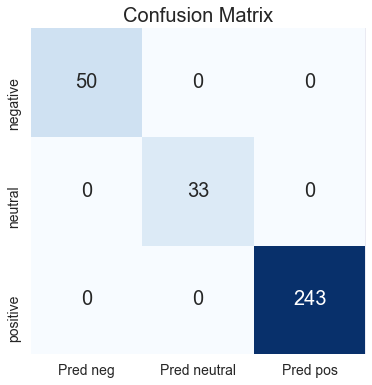

In [116]:

conmat = np.array(confusion_matrix(y_test, rf.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],\
                     columns=['Pred neg', 'Pred neutral', 'Pred pos'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.savefig('ConfusionMatric.png')


In [203]:
# SAVE THIS MANUALLY TO A PICTURE
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        50
     Neutral       1.00      1.00      1.00        33
    Positive       1.00      1.00      1.00       243

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326
weighted avg       1.00      1.00      1.00       326



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [204]:
df_distinct.isnull().sum()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Forum ID            0
Forum Name          0
Subject             0
Post Date           0
User DisplayName    0
Forum_Post_Raw      0
compound            0
neg                 0
neu                 0
pos                 0
Sentiment           0
PostDate            0
DayName             0
DayOfMonth          0
dtype: int64

In [205]:
# df_distinct

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [206]:
df = df_distinct.copy()
df['ShortText'] = df['Forum_Post_Raw'].str[:50]
df.dtypes
dfLDA = df.copy()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [207]:
dfLDA['Forum_Post_Raw'].isnull().sum()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0

In [208]:
# dfLDA['Forum_Post_Raw'].dropna(inplace=True)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [209]:
df.set_index('PostDate', inplace=True)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [210]:
df.head(1)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,DayName,DayOfMonth,ShortText
PostDate,,,,,,,,,,,,,,
2019-10-10 05:58:05.730,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,Thursday,10,Company upgraded to windows 10. Used to run an...


In [211]:
df2 = df.sort_values(['PostDate']).copy()


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [212]:
fig = px.line(df2, x='Post Date', y='neg')
fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [213]:
fig = px.line(df2, x='Post Date', y='pos', color='Sentiment')
fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [214]:
# fig = go.figure(
#     go.Table(
#         columnwidth = [50,300,60,40,40],
#         header=dict(
#             values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#             font=dict(size=10),
#             align="left"
#         ),
#         # cells=dict(
#         #     values=[tweets[["created_at","text", "screen_name", "neg", "neu", "pos"]]],
#         #     align = "left")
#         cells=dict(values=[df['Post Date'], df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                 fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                 align=['left', 'left', 'left', 'center', 'center', 'center'])        
#     ),
#     row=1, col=1
# )
# fig.update_layout(
#     height=800,
#     showlegend=False,
#     title_text="Twitter Sentiment for " + GraphTitle,
# )




# headerColor = 'grey'
# rowEvenColor = 'lightgrey'
# rowOddColor = 'white'
# alignment = ['left', 'left', 'left', 'center', 'center', 'center']

# fig = go.Figure(data=[go.Table(
#     columnwidth = [30,300,60,40,40],
#     header=dict(values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#                 fill_color=headerColor,
#                 align=alignment),
#     cells=dict(values=[df['PostDate'].dt.strftime("%m/%d/%y %H:%M:%S"), df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                fill_color = [[rowOddColor,rowEvenColor]*df.shape[0]],
#                align=alignment))
# ])

# fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [215]:
# headerColor = 'grey'
# rowEvenColor = 'lightgrey'
# rowOddColor = 'white'

# # for i, row in enumerate(df_Forum["Post Date"]):
# #     p = re.compile(" 00:00:00")
# #     datetime = p.split(df["Post Date"][i])[0]
# #     df.iloc[i, 1] = datetime

# fig = make_subplots(
#     rows=3, cols=1,
#     shared_xaxes=True,
#     vertical_spacing=0.03,
#     specs=[[{"type": "table"}],
#            [{"type": "scatter"}],
#            [{"type": "scatter"}]]
# )

# fig.add_trace(
#     go.Scatter(
#         x=df["Post Date"],
#         y=df["pos"],
#         mode="lines",
#         name="Positive Sentiment"
#     ),
#     row=3, col=1
# )

# fig.add_trace(
#     go.Scatter(
#         x=df["Post Date"],
#         y=df["neg"],
#         mode="lines",
#         name="Negative Sentiment"
#     ),
#     row=2, col=1
# )

# fig.add_trace(
#     go.Table(
#         columnwidth = [50,300,60,40,40],
#         header=dict(
#             values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#             font=dict(size=10),
#             align="left"
#         ),
#         # cells=dict(
#         #     values=[tweets[["created_at","text", "screen_name", "neg", "neu", "pos"]]],
#         #     align = "left")
#         cells=dict(values=[df['Post Date'], df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                 fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                 align=['left', 'left', 'left', 'center', 'center', 'center'])        
#     ),
#     row=1, col=1
# )
# fig.update_layout(
#     height=800,
#     showlegend=False,
#     title_text="Twitter Sentiment for " + GraphTitle,
# )

# fig.write_html('Sentiment.html')
# fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [216]:
features = ['Forum_Post_Raw','neg','neu','pos']

# Top 5 Neutral Posts
dfNeu = df[features].sort_values("neu", ascending=False).head(5)
dfNeu.name = "Neutral"

# Top 5 Negative Posts
dfNeg = df[features].sort_values("neg", ascending=False).head(5)
dfNeg.name = "Negative"

# Top 5 Positive Posts
dfPos = df[features].sort_values("pos", ascending=False).head(5)
dfPos.name = "Positive"
dataSets = [dfNeu,dfPos, dfNeg]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [217]:
df.describe()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,compound,neg,neu,pos,DayOfMonth
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,91.429098,0.358396,0.039499,0.853801,0.105767,15.840700
std,155.599403,0.520617,0.053476,0.091070,0.076172,8.454238
min,40.000000,-0.997200,0.000000,0.000000,0.000000,1.000000
25%,40.000000,0.000000,0.000000,0.802000,0.050000,9.000000
50%,40.000000,0.495150,0.018000,0.862500,0.098000,16.000000
75%,40.000000,0.805275,0.064000,0.916000,0.152000,23.000000
max,673.000000,0.989500,0.415000,1.000000,0.394000,31.000000


In [218]:
# Alternative way to make tables, doesn't work as well!
# import plotly.figure_factory as ff

# def WriteTable(dataSets):
#     for frame in dataSets:
#         fig =  ff.create_table(frame)
#         fig.write_html(frame.name+".html")
#         fig.show()

# WriteTable(dataSets)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [219]:

import plotly.graph_objects as go
import pandas as pd

def WriteMyTable(dataSets):
    for frame in dataSets:
        headerColor = 'grey'
        rowEvenColor = 'lightgrey'
        rowOddColor = 'white'

        fig = go.Figure(data=[go.Table(
            columnwidth = [300,40,40,40],
            header=dict(values=[x for x in features],
                        fill_color='#39416C',                
                        font=dict(color='white', size=12),
                        align=['left', 'center', 'center', 'center']),
            cells=dict(values=[frame.Forum_Post_Raw, frame.neg, frame.neu, frame.pos],
                    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
                    align=['left', 'center', 'center', 'center']))
        ])
        fig.update_layout(title=frame.name, width=1000, height=400)
        fig.write_html(frame.name+".html")
        fig.show()

WriteMyTable(dataSets)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Charting Ideas
1. Top pos / neg post by user
2. Trend line over time (SNS) color = user
- Does it match up to release dates or seasonal timings? 
- Was there a bad release?
- Was there a good release?
- Can we classify based on tags?

3. PCA analysis
4. Felix analysis (lda): https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc
5. Prediction of nltk accuracy chart?

# Latent Dirichlet Allocation (LDA) Analysis

Three main parameters of the model
1. Number of topics
2. Number of words per topic
3. Number of topics per document

In [220]:
from gensim import corpora, models
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from gensim.models import Phrases
from gensim import corpora
from gensim import models
import numpy as np


import nltk
nltk.download('averaged_perceptron_tagger')
from itertools import chain # to flatten list of sentences of tokens into list of tokens



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-220-6223f08b0e3e>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



0it [00:00, ?it/s]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [221]:
# dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
# dictionary_LDA.filter_extremes(no_below=3)
# corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

# num_topics = 20
# %time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
#                                   id2word=dictionary_LDA, \
#                                   passes=4, alpha=[0.01]*num_topics, \
#                                   eta=[0.01]*len(dictionary_LDA.keys()))

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Tokenization

In [222]:
dfLDA.isna().sum()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Forum ID            0
Forum Name          0
Subject             0
Post Date           0
User DisplayName    0
Forum_Post_Raw      0
compound            0
neg                 0
neu                 0
pos                 0
Sentiment           0
PostDate            0
DayName             0
DayOfMonth          0
ShortText           0
dtype: int64

In [223]:
dfLDA['sentences'] = dfLDA.Forum_Post_Raw.progress_map(sent_tokenize)
dfLDA['sentences'].head(1).tolist()[0][:3]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

['Company upgraded to windows 10.',
 'Used to run an ERP program which no one heard about, made by U8Soft (keep in mind that the company is in China).',
 'They are now asking for an insanely high amount of money to get it to work on windows 10.']

In [224]:
dfLDA['token_sentences'] = dfLDA['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(dfLDA['token_sentences'].head(1).tolist()[0][:3])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[['Company', 'upgraded', 'to', 'windows', '10', '.'], ['Used', 'to', 'run', 'an', 'ERP', 'program', 'which', 'no', 'one', 'heard', 'about', ',', 'made', 'by', 'U8Soft', '(', 'keep', 'in', 'mind', 'that', 'the', 'company', 'is', 'in', 'China', ')', '.'], ['They', 'are', 'now', 'asking', 'for', 'an', 'insanely', 'high', 'amount', 'of', 'money', 'to', 'get', 'it', 'to', 'work', 'on', 'windows', '10', '.']]


In [225]:
dfLDA['tokens_sentences'] = dfLDA['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(dfLDA['tokens_sentences'].head(1).tolist()[0][:3])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[['Company', 'upgraded', 'to', 'windows', '10', '.'], ['Used', 'to', 'run', 'an', 'ERP', 'program', 'which', 'no', 'one', 'heard', 'about', ',', 'made', 'by', 'U8Soft', '(', 'keep', 'in', 'mind', 'that', 'the', 'company', 'is', 'in', 'China', ')', '.'], ['They', 'are', 'now', 'asking', 'for', 'an', 'insanely', 'high', 'amount', 'of', 'money', 'to', 'get', 'it', 'to', 'work', 'on', 'windows', '10', '.']]


## Lemmatize with POS tagging

In [226]:
dfLDA['POS_tokens'] = dfLDA['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(dfLDA['POS_tokens'].head(1).tolist()[0][:3])


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[[('Company', 'NN'), ('upgraded', 'VBD'), ('to', 'TO'), ('windows', 'VB'), ('10', 'CD'), ('.', '.')], [('Used', 'VBN'), ('to', 'TO'), ('run', 'VB'), ('an', 'DT'), ('ERP', 'NNP'), ('program', 'NN'), ('which', 'WDT'), ('no', 'DT'), ('one', 'NN'), ('heard', 'NN'), ('about', 'IN'), (',', ','), ('made', 'VBN'), ('by', 'IN'), ('U8Soft', 'NNP'), ('(', '('), ('keep', 'VB'), ('in', 'IN'), ('mind', 'NN'), ('that', 'IN'), ('the', 'DT'), ('company', 'NN'), ('is', 'VBZ'), ('in', 'IN'), ('China', 'NNP'), (')', ')'), ('.', '.')], [('They', 'PRP'), ('are', 'VBP'), ('now', 'RB'), ('asking', 'VBG'), ('for', 'IN'), ('an', 'DT'), ('insanely', 'RB'), ('high', 'JJ'), ('amount', 'NN'), ('of', 'IN'), ('money', 'NN'), ('to', 'TO'), ('get', 'VB'), ('it', 'PRP'), ('to', 'TO'), ('work', 'VB'), ('on', 'IN'), ('windows', 'NNS'), ('10', 'CD'), ('.', '.')]]


In [227]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [228]:
# Lemmatizing each word with its POS tag, in each sentence
dfLDA['tokens_sentences_lemmatized'] = dfLDA['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

In [229]:
dfLDA['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['Company', 'upgrade', 'to', 'windows', '10', '.'],
 ['Used',
  'to',
  'run',
  'an',
  'ERP',
  'program',
  'which',
  'no',
  'one',
  'heard',
  'about',
  ',',
  'make',
  'by',
  'U8Soft',
  '(',
  'keep',
  'in',
  'mind',
  'that',
  'the',
  'company',
  'be',
  'in',
  'China',
  ')',
  '.'],
 ['They',
  'be',
  'now',
  'ask',
  'for',
  'an',
  'insanely',
  'high',
  'amount',
  'of',
  'money',
  'to',
  'get',
  'it',
  'to',
  'work',
  'on',
  'window',
  '10',
  '.']]

## Regrouping tokens and removing stop words

In [403]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
stopwords_nonsense = ['hello', 'thanks', 'le', 'la', 'hi', 'try', 'sage', 'however', 'way', 'data', 'download']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other + stopwords_nonsense


In [404]:
dfLDA['tokens'] = dfLDA['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
dfLDA['tokens'] = dfLDA['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])


In [405]:
dfLDA.shape

(1086, 29)

In [406]:
dfLDA['tokens'].head(1).tolist()[0][:30]


['company',
 'upgrade',
 'windows',
 'used',
 'run',
 'erp',
 'program',
 'heard',
 'keep',
 'mind',
 'company',
 'china',
 'ask',
 'insanely',
 'high',
 'amount',
 'money',
 'work',
 'window',
 'instal',
 'window',
 'ca',
 'select',
 'server',
 'drop',
 'menu',
 'almost',
 'network',
 'list',
 'except']

## Data Preparation

In [689]:
tokens = dfLDA['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])


In [690]:
dfLDA.shape

(1086, 29)

In [691]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]


In [692]:
np.random.seed(123456)
num_topics = 4

%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=10, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary_LDA.keys()))



Wall time: 5.74 s


In [693]:
lda_model.save('myLdaModel.model')

In [694]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=50):
    print(str(i)+": "+ topic)
    print()

0: 0.020*"error" + 0.018*"create" + 0.011*"file" + 0.010*"table" + 0.009*"field" + 0.008*"call" + 0.008*"work" + 0.008*"customer" + 0.007*"line" + 0.007*"run" + 0.007*"function" + 0.006*"anyone" + 0.006*"set" + 0.006*"folder" + 0.006*"add" + 0.005*"example" + 0.005*"find" + 0.005*"process" + 0.005*"code" + 0.005*"date" + 0.005*"update" + 0.005*"view" + 0.005*"show" + 0.005*"issue" + 0.004*"change" + 0.004*"http" + 0.004*"receipt" + 0.004*"detail" + 0.004*"user" + 0.004*"server" + 0.004*"possible" + 0.004*"return" + 0.004*"client" + 0.004*"help" + 0.004*"sql" + 0.004*"select" + 0.004*"link" + 0.004*"version" + 0.004*"check" + 0.004*"problem" + 0.004*"click" + 0.004*"sale_order" + 0.004*"still" + 0.003*"object" + 0.003*"log" + 0.003*"type" + 0.003*"error_message" + 0.003*"different" + 0.003*"column" + 0.003*"database"

1: 0.016*"user" + 0.011*"create" + 0.009*"run" + 0.009*"new" + 0.009*"change" + 0.009*"screen" + 0.009*"table" + 0.009*"find" + 0.007*"error" + 0.007*"product" + 0.007*"se

In [695]:
# for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
#     print(str(i)+": "+ topic)
#     print()

model_topic_words =[]
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    t_words =[]
    ts =topic.split("+")
    for t in range(0, len(ts)):
        # print(ts[t].split('*'))
        t_words.append(ts[t].split('*')[1])

    model_topic_words.append(t_words)

# model_topic_words[:2]



In [696]:
## Allocation topics to documents
dfLDA.head(1)


,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct
0,0,0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,...,"[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr...",1,0.516503,6,0.304738,4,0.176968


In [697]:
dfLDA.shape

(1086, 29)

In [698]:
lda_model[corpus[0]]

[(1, 0.9991674)]

## Predict based on input

# Advanced exploration of LDA result
## Allocation of topics in all documents

In [699]:
topics = [lda_model[corpus[i]] for i in range(len(dfLDA))]

In [700]:

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [701]:
topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038537,NaN,NaN,NaN,NaN,NaN,0.091301,NaN,NaN,0.869287,NaN


In [702]:

# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [703]:
# Which document are about topic 14
# document_topic.sort_values(num_topics-1, ascending=False)[num_topics-1].head(10)
document_topic

,0,1,2,3
0,0.000000,0.999167,0.000000,0.000000
1,0.000000,0.523965,0.475429,0.000000
2,0.000000,0.000000,0.000000,0.998424
3,0.000000,0.000000,0.000000,0.998424
4,0.322044,0.000000,0.000000,0.677048
...,...,...,...,...
1081,0.000000,0.998698,0.000000,0.000000
1082,0.000000,0.433798,0.000000,0.564390
1083,0.000000,0.000000,0.994047,0.000000
1084,0.250000,0.250000,0.250000,0.250000


In [704]:
dfLDA.head(5)

,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct
0,0,0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,...,"[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr...",1,0.516503,6,0.304738,4,0.176968
1,1,31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,...,"[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde...",8,0.997698,0,0.0,1,0.0
2,2,62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,...,"[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, field, type, click...",3,0.995288,0,0.0,1,0.0
3,3,63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,...,"[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, field, type, click...",3,0.995288,0,0.0,1,0.0
4,4,64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,...,"[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro...",7,0.72929,0,0.169804,8,0.098791


In [705]:
print(dfLDA.Forum_Post_Raw.loc[31][:100])

X3 v8 patch 10.
We are UK based, and have been told to upgrade, but was wondering whether it is poss


<AxesSubplot:>

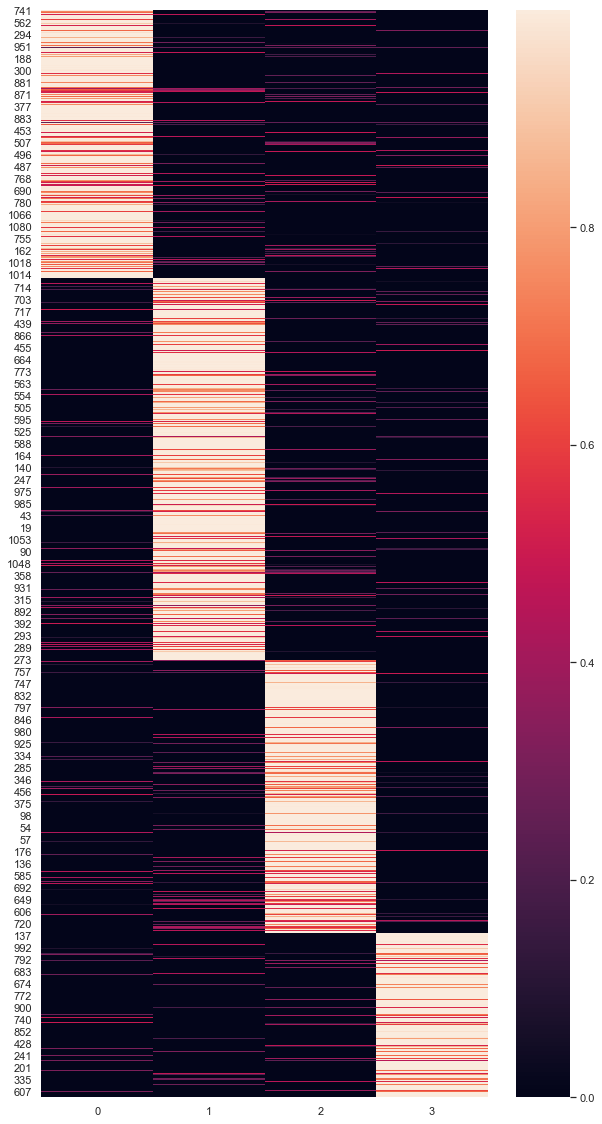

In [706]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

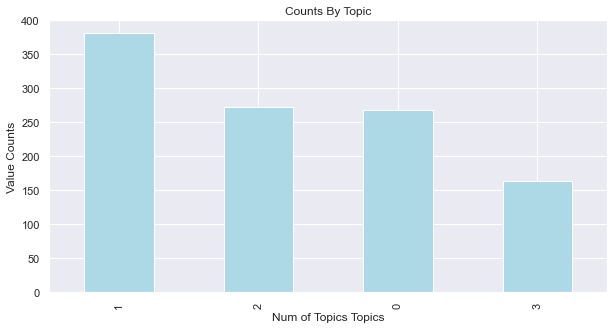

In [707]:
sns.set(rc={'figure.figsize':(10,5)})
ax = document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue', title='Counts By Topic')
ax.set_xlabel("Num of Topics Topics")
ax.set_ylabel("Value Counts")
ax.figure.savefig('TopicValueCounts.png')

# Visualize the data

In [708]:
# ! pip install pyLDAvis

In [709]:
# import scipy
# scipy.test()

In [710]:
dfLDA.shape

(1086, 29)

In [711]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a    parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)


%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.save_html(vis, 'myBook.html')
pyLDAvis.display(vis)

In [712]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object

In [713]:
dfLDA.head()

,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct
0,0,0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,...,"[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr...",1,0.516503,6,0.304738,4,0.176968
1,1,31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,...,"[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde...",8,0.997698,0,0.0,1,0.0
2,2,62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,...,"[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, field, type, click...",3,0.995288,0,0.0,1,0.0
3,3,63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,...,"[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, field, type, click...",3,0.995288,0,0.0,1,0.0
4,4,64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,...,"[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro...",7,0.72929,0,0.169804,8,0.098791


In [714]:
print(dfLDA.shape)
print(len(document_topic))

(1086, 29)
1086


In [715]:
dfBob = dfLDA.copy()

In [716]:
dfBob = dfBob.reset_index()
dfBob

ValueError: cannot insert level_0, already exists

In [717]:
document_topic

,0,1,2,3
0,0.000000,0.999167,0.000000,0.000000
1,0.000000,0.523965,0.475429,0.000000
2,0.000000,0.000000,0.000000,0.998424
3,0.000000,0.000000,0.000000,0.998424
4,0.322044,0.000000,0.000000,0.677048
...,...,...,...,...
1081,0.000000,0.998698,0.000000,0.000000
1082,0.000000,0.433798,0.000000,0.564390
1083,0.000000,0.000000,0.994047,0.000000
1084,0.250000,0.250000,0.250000,0.250000


In [718]:
dfLDA = dfBob.copy()
print(dfLDA.shape)

(1086, 29)


In [719]:
for i in range(0,3):
    dfLDA['topic'+ str(i)]=None
    dfLDA['topic'+str(i)+'_pct']=None

for r in range(0,len(document_topic)):
    ts = document_topic.loc[r].sort_values(ascending=False)[:3]
#     print(ts)
    topic_nums = list(ts.index)
    print(topic_nums)
    topic_pcts = list(ts)
#     print(topic_pcts)
    for i in range(0,3):
        dfLDA.at[r,'topic'+ str(i)]=topic_nums[i]
        dfLDA.at[r,'topic'+ str(i)+'_pct']=topic_pcts[i]

# dfLDA.head(5)

[1, 0, 2]
[1, 2, 0]
[3, 0, 1]
[3, 0, 1]
[3, 0, 1]
[1, 0, 2]
[0, 1, 2]
[1, 2, 0]
[1, 3, 0]
[2, 0, 1]
[0, 1, 2]
[1, 0, 2]
[1, 0, 2]
[3, 1, 0]
[2, 0, 1]
[3, 0, 1]
[2, 0, 1]
[3, 0, 1]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[3, 0, 1]
[2, 0, 1]
[3, 1, 0]
[0, 1, 2]
[1, 0, 2]
[3, 0, 1]
[1, 0, 2]
[3, 0, 1]
[1, 0, 2]
[3, 0, 1]
[1, 0, 2]
[1, 0, 2]
[0, 1, 2]
[1, 0, 2]
[0, 1, 2]
[2, 0, 3]
[3, 0, 1]
[2, 0, 1]
[2, 0, 1]
[0, 3, 1]
[1, 0, 2]
[0, 1, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[3, 0, 1]
[3, 1, 0]
[2, 1, 0]
[2, 0, 1]
[3, 0, 1]
[0, 2, 1]
[2, 0, 1]
[3, 0, 1]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[1, 0, 2]
[3, 2, 0]
[1, 0, 2]
[1, 2, 0]
[2, 0, 1]
[0, 1, 2]
[1, 0, 2]
[1, 2, 0]
[2, 0, 1]
[0, 3, 1]
[2, 0, 1]
[2, 0, 1]
[0, 1, 2]
[2, 0, 1]
[1, 0, 2]
[0, 1, 2]
[1, 0, 2]
[3, 0, 1]
[3, 0, 1]
[1, 0, 2]
[0, 2, 1]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[1, 2, 0]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[3, 0, 1]
[2, 0, 1]
[1, 0, 2]
[3, 0, 1]
[1, 2, 0]
[1, 3, 0]
[2, 0, 1]
[2, 0, 1]
[0, 2, 1]
[0, 2, 1]
[2, 0, 1]
[0, 1, 2]


[1, 0, 2]
[0, 1, 2]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[1, 3, 0]
[2, 0, 1]
[0, 2, 1]
[1, 0, 2]
[3, 0, 1]
[2, 0, 1]
[0, 1, 2]
[2, 0, 1]
[0, 3, 1]
[2, 0, 1]
[0, 2, 1]
[2, 0, 1]
[1, 0, 2]
[1, 0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[2, 0, 1]
[0, 2, 1]
[0, 1, 2]
[0, 2, 1]
[0, 1, 2]
[2, 0, 1]
[3, 0, 1]
[3, 0, 1]
[1, 0, 2]
[0, 1, 2]
[0, 1, 2]
[3, 0, 1]
[0, 1, 2]
[0, 2, 1]
[1, 2, 0]
[1, 0, 2]
[0, 1, 2]
[1, 2, 0]
[2, 0, 1]
[2, 0, 1]
[3, 0, 1]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 1, 0]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[2, 1, 0]
[3, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[3, 0, 1]
[0, 1, 2]
[3, 0, 1]
[1, 0, 2]
[3, 0, 1]
[2, 0, 1]
[2, 0, 1]
[1, 2, 0]
[0, 1, 2]
[2, 0, 1]
[3, 0, 1]
[2, 0, 1]
[1, 0, 2]
[0, 1, 2]
[1, 2, 0]
[3, 1, 0]
[1, 0, 2]
[1, 2, 0]
[3, 0, 1]
[3, 0, 1]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[2, 0, 1]
[0, 1, 2]
[0, 1, 2]
[2, 1, 0]
[1, 0, 2]
[0, 1, 2]
[1, 2, 0]
[2, 0, 1]
[0, 1, 2]
[0, 1, 2]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[0, 1, 2]
[3, 0, 1]
[1, 0, 2]
[1, 3, 0]


In [720]:
dfLDA.columns

Index(['level_0', 'index', 'Forum ID', 'Forum Name', 'Subject', 'Post Date',
       'User DisplayName', 'Forum_Post_Raw', 'compound', 'neg', 'neu', 'pos',
       'Sentiment', 'PostDate', 'DayName', 'DayOfMonth', 'ShortText',
       'sentences', 'token_sentences', 'tokens_sentences', 'POS_tokens',
       'tokens_sentences_lemmatized', 'tokens', 'topic0', 'topic0_pct',
       'topic1', 'topic1_pct', 'topic2', 'topic2_pct'],
      dtype='object')

In [721]:
dfLDA.tail(2)


,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct
1084,1084,2941,332,Sage Data &amp; Analytics,year closing,2020-01-20T07:01:58.37,info@epochholland.nl,,0.0000,0.000,...,[],[],[],[],0,0.25,1,0.25,2,0.25
1085,1085,2942,332,Sage Data &amp; Analytics,add CPTANALIN table to requester,2019-10-10T15:41:06.877,Christine T.,requester links aren't my strong suit- I can h...,0.7905,0.041,...,"[[requester, links, are, n't, my, strong, suit...","[[(requester, NN), (links, NNS), (are, VBP), (...","[[requester, link, be, n't, my, strong, suit-,...","[requester, link, strong, handle, crystal, rep...",2,0.542575,0,0.455613,1,0.0


In [722]:
dfLDA.shape

(1086, 29)

In [723]:
dfLDA[dfLDA['topic0']==2].columns

Index(['level_0', 'index', 'Forum ID', 'Forum Name', 'Subject', 'Post Date',
       'User DisplayName', 'Forum_Post_Raw', 'compound', 'neg', 'neu', 'pos',
       'Sentiment', 'PostDate', 'DayName', 'DayOfMonth', 'ShortText',
       'sentences', 'token_sentences', 'tokens_sentences', 'POS_tokens',
       'tokens_sentences_lemmatized', 'tokens', 'topic0', 'topic0_pct',
       'topic1', 'topic1_pct', 'topic2', 'topic2_pct'],
      dtype='object')

In [724]:
# dfLDA[dfLDA['topic0']==0].Forum_Post_Raw.apply(lambda t: print(t, '\n\n'))

In [725]:
dfResults = dfLDA[['Forum Name','Forum_Post_Raw', 'topic0_pct', 'topic1_pct', 'topic2_pct']].copy()
# dfResults = dfResults[dfResults['Forum_Post_Raw'].notna()]
# dfResults = dfResults[dfResults['topic0'].notna()]
dfResults

,Forum Name,Forum_Post_Raw,topic0_pct,topic1_pct,topic2_pct
0,Sage X3 General Discussion,Company upgraded to windows 10. Used to run an...,0.999167,0.0,0.0
1,Sage X3 General Discussion,Hello!\n\nI see that Sage V11 patch 14 was com...,0.523965,0.475429,0.0
2,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",0.998424,0.0,0.0
3,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",0.998424,0.0,0.0
4,Sage X3 General Discussion,I am trying to remove some of the columns on t...,0.677048,0.322044,0.0
...,...,...,...,...,...
1081,Sage Data &amp; Analytics,\nThe above pic is carry forward selection ch...,0.998698,0.0,0.0
1082,Sage Data &amp; Analytics,"Hello guys, \n\nI hope you are well. \n\nI mad...",0.56439,0.433798,0.0
1083,Sage Data &amp; Analytics,It says all the lines are converted but it did...,0.994047,0.0,0.0
1084,Sage Data &amp; Analytics,,0.25,0.25,0.25


In [726]:
dfLDA[dfLDA['topic0']==0]

,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct
6,6,126,40,Sage X3 General Discussion,V12 Data Model,2019-10-11T16:02:41.787,Juan Pablo G,Is the online help data model correct for V12?...,0.4019,0.000,...,"[[Is, the, online, help, data, model, correct,...","[[(Is, VBZ), (the, DT), (online, NN), (help, N...","[[Is, the, online, help, data, model, correct,...","[online, help, model, correct, file, show]",0,0.994047,1,0.0,2,0.0
10,10,250,40,Sage X3 General Discussion,X3 Price list activation/deactivation,2019-10-14T22:38:08.26,garry@kbm.net.au,Hi all.\nI have unchecked the Active box on a ...,-0.3818,0.102,...,"[[Hi, all, .], [I, have, unchecked, the, Activ...","[[(Hi, NNP), (all, DT), (., .)], [(I, PRP), (h...","[[Hi, all, .], [I, have, unchecked, the, Activ...","[unchecked, active, box, sale, price, list, ve...",0,0.719807,1,0.2782,2,0.0
26,26,656,40,Sage X3 General Discussion,web service X3 V11 Cannot read property &#39;G...,2019-10-23T12:09:17.84,Alec6,"Hi,\nI see this question without solution post...",0.0098,0.055,...,"[[Hi, ,, I, see, this, question, without, solu...","[[(Hi, NNP), (,, ,), (I, PRP), (see, VBP), (th...","[[Hi, ,, I, see, this, question, without, solu...","[question, without, solution, post, year, ago,...",0,0.996681,1,0.0,2,0.0
35,35,845,40,Sage X3 General Discussion,XML Example of deleteLines and InsertLines,2019-10-29T16:46:32.203,ChrisCC,Can I get an example XML view of how the delet...,0.6597,0.000,...,"[[Can, I, get, an, example, XML, view, of, how...","[[(Can, MD), (I, PRP), (get, VB), (an, DT), (e...","[[Can, I, get, an, example, XML, view, of, how...","[example, xml, view, deletelines, insertlines,...",0,0.995033,1,0.0,2,0.0
37,37,877,40,Sage X3 General Discussion,Production Planner,2019-10-30T08:21:45.053,Mikael,"\n\nAny Clues? The Application Error ""The map...",-0.1027,0.129,...,"[[Any, Clues, ?], [The, Application, Error, ``...","[[(Any, DT), (Clues, NNP), (?, .)], [(The, DT)...","[[Any, Clues, ?], [The, Application, Error, ``...","[clues, application, error, mapping, productio...",0,0.995738,1,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1069,2872,294,Sage Enterprise Intelligence for Sage X3,Sage Enterprise Intelligence Error: Object ref...,2019-12-18T02:18:53.803,Efekpokpor Oke,"Hello Guys,\n\nI'm getting the below error mes...",0.4019,0.074,...,"[[Hello, Guys, ,, I, 'm, getting, the, below, ...","[[(Hello, NNP), (Guys, NNP), (,, ,), (I, PRP),...","[[Hello, Guys, ,, I, 'm, get, the, below, erro...","[guys, error, message, change, reporting, code...",0,0.998129,1,0.0,2,0.0
1073,1073,2876,294,Sage Enterprise Intelligence for Sage X3,Joining Tables with Mismatched Data Types,2019-10-24T14:04:33.85,Corey Milbert,I am trying to create view that shows the numb...,-0.4398,0.118,...,"[[I, am, trying, to, create, view, that, shows...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, create, view, that, show, th...","[create, view, show, number, po, receipt, per,...",0,0.999092,1,0.0,2,0.0
1079,1079,2936,332,Sage Data &amp; Analytics,Script Dictionary &gt; Screen &gt; Field &gt; ...,2020-07-15T03:11:16.5,jacksonsageuser,Could someone help me how can do the display o...,0.4404,0.092,...,"[[Could, someone, help, me, how, can, do, the,...","[[(Could, NNP), (someone, NN), (help, VB), (me...","[[Could, someone, help, me, how, can, do, the,...","[could, someone, help, display, output, add, d...",0,0.995738,1,0.0,2,0.0
1080,1080,2937,332,Sage Data &amp; Analytics,Landing page error in version 12 - After Migra...,2020-06-26T07:38:55.12,Greytrix,"Hi All,\nWe have migrated the data from versio...",0.7328,0.073,...,"[[Hi, All, ,, We, have, migrated, the, data, f...","[[(Hi, NNP), (All, NNP), (,, ,), (We, PRP), (h...","[[Hi, All, ,, We, have, migrate, the, data, fr..."

In [727]:
# frame.Forum_Post_Raw, frame.neg, frame.neu, frame.pos
dfResults.to_html(open('results.html', 'w'))


In [728]:
dfResults

,Forum Name,Forum_Post_Raw,topic0_pct,topic1_pct,topic2_pct
0,Sage X3 General Discussion,Company upgraded to windows 10. Used to run an...,0.999167,0.0,0.0
1,Sage X3 General Discussion,Hello!\n\nI see that Sage V11 patch 14 was com...,0.523965,0.475429,0.0
2,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",0.998424,0.0,0.0
3,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",0.998424,0.0,0.0
4,Sage X3 General Discussion,I am trying to remove some of the columns on t...,0.677048,0.322044,0.0
...,...,...,...,...,...
1081,Sage Data &amp; Analytics,\nThe above pic is carry forward selection ch...,0.998698,0.0,0.0
1082,Sage Data &amp; Analytics,"Hello guys, \n\nI hope you are well. \n\nI mad...",0.56439,0.433798,0.0
1083,Sage Data &amp; Analytics,It says all the lines are converted but it did...,0.994047,0.0,0.0
1084,Sage Data &amp; Analytics,,0.25,0.25,0.25


# Obtaining A Coherence Score

In [729]:
# ! pip install spacy

In [730]:
dfLDA.tokens

0       [company, upgrade, windows, used, run, erp, pr...
1       [patch, complete, october, least, patch, finde...
2       [access, log, http, search, field, type, click...
3       [access, log, http, search, field, type, click...
4       [remove, column, object, stock, selection, bro...
                              ...                        
1081    [pic, carry, forward, selection, check, unchec...
1082    [guy, hope, well, research, surprisingly, find...
1083    [line, convert, generate, dat, file, idea, ple...
1084                                                   []
1085    [requester, link, strong, handle, crystal, rep...
Name: tokens, Length: 1086, dtype: object

In [731]:
id2word = Dictionary(tokens)
id2word

In [745]:
# https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

# C_v measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
# C_p is based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson’s coherence
# C_uci measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
# C_umass is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
# C_npmi is an enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
# C_a is baseed on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity

cm = CoherenceModel(model=lda_model, corpus=corpus, texts=dfLDA['Forum_Post_Raw'], coherence='u_mass')
cm.get_coherence()

-4.46218360875975

In [733]:
dfLDA['tokens_sentences_lemmatized'].head()

0    [[Company, upgrade, to, windows, 10, .], [Used...
1    [[Hello, !], [I, see, that, Sage, V11, patch, ...
2    [[To, access, this, download, ,, log, into, ht...
3    [[To, access, this, download, ,, log, into, ht...
4    [[I, be, try, to, remove, some, of, the, colum...
Name: tokens_sentences_lemmatized, dtype: object

In [734]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
#         model=lda_model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [735]:
# dfLDA['tokens'][:3].to_list()

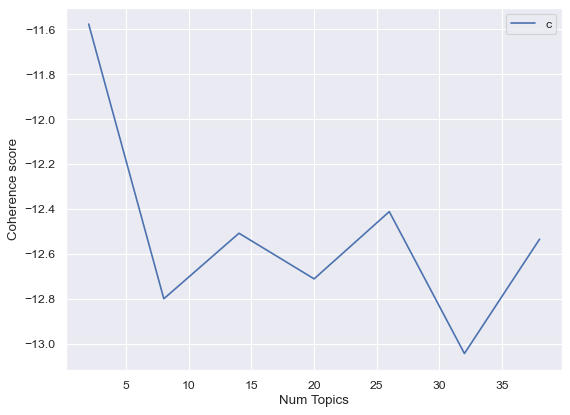

In [736]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word , corpus=corpus, texts=dfLDA['tokens'].to_list(), start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [587]:
# data = pd.DataFrame({"Num Topics": x, "Coherence score": coherence_values})
# sns.lineplot(data=data, x='Num Topics', y='Coherence score', markers=True)